# Credit Simplonien

## Import

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('../data/train.txt')
df_test = pd.read_csv('../data/test.txt')

In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train = df_train.dropna()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Nous avons charger les deux dataset et il sont uniforme du point de vue de leurs conception, passons à l'exploration

J'ai décider de ne pas rassemblé les dataset pour le preprocessing, commencons par le train dataset

In [8]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().any()]
print("No. of columns containing null values")
print(len(df_train.columns[df_train.isna().any()]))

print("No. of columns not containing null values")
print(len(df_train.columns[df_train.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(df_train.columns))

No. of columns containing null values
0
No. of columns not containing null values
13
Total no. of columns in the dataframe
13


In [9]:
df_train.duplicated().value_counts()

False    480
dtype: int64

Pas de duplicate

In [10]:
# let's see our data distribution

print(df_train['Loan_Status'].value_counts())
print('-'* 30)
print('Solvable: ', round(df_train['Loan_Status'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Non Solvable: ', round(df_train['Loan_Status'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Y    332
N    148
Name: Loan_Status, dtype: int64
------------------------------
Solvable:  69.17 % of the dataset
Non Solvable:  30.83 % of the dataset


Les classes sont fortement déséquilibrée, nous devons résoudre ce problème. Voyons voir la distribution !

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

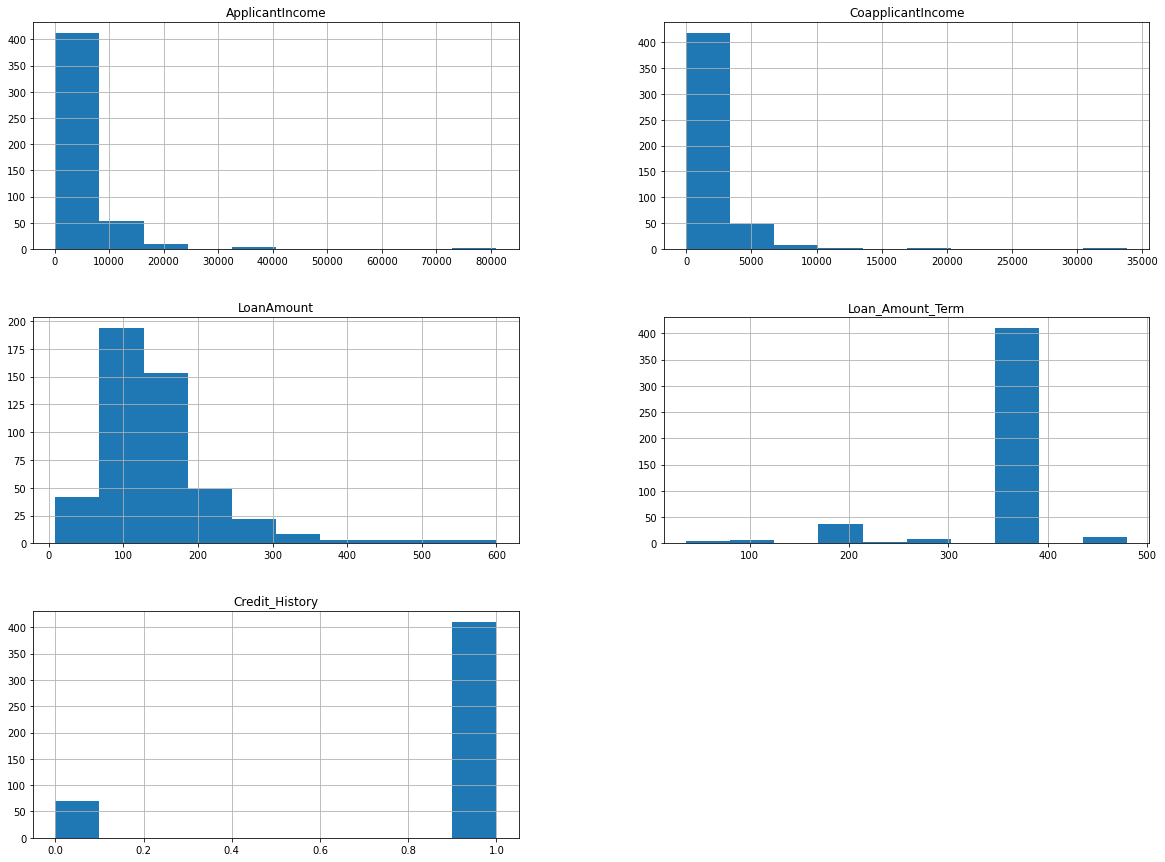

In [11]:
df_train.hist(figsize=(20,15))

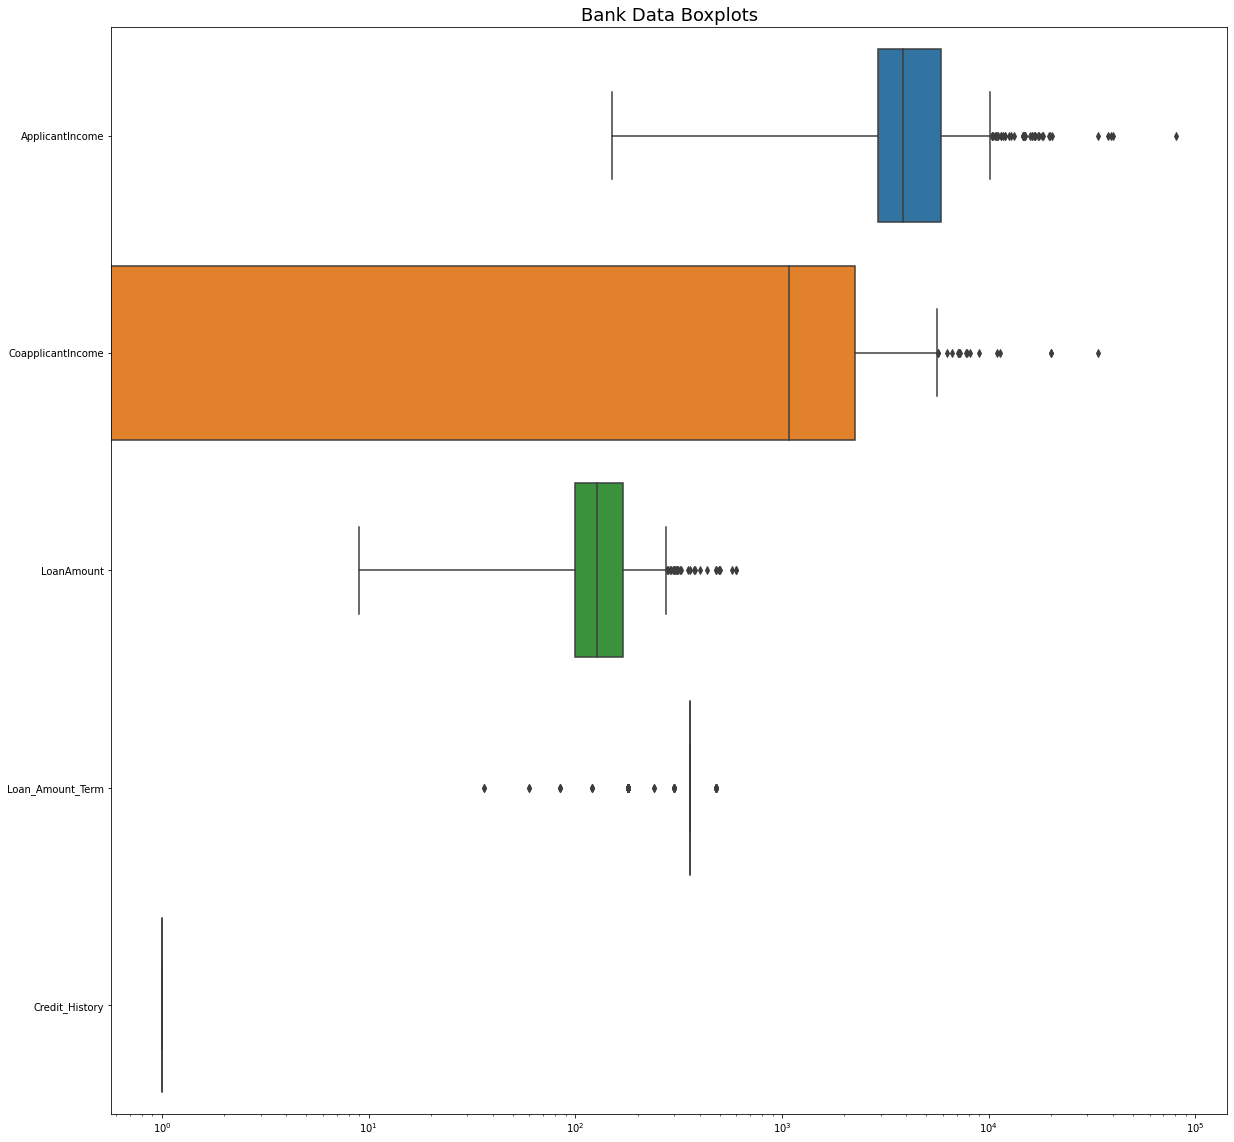

In [12]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df_train, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [13]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df_train['Education'].value_counts()
df_train['Property_Area'].value_counts()
df_train['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_train['Loan_Status'] = enc.fit_transform(df_train[['Loan_Status']])
df_train['Gender'] = enc.fit_transform(df_train[['Gender']])
df_train['Self_Employed'] = enc.fit_transform(df_train[['Self_Employed']])
df_train['Education'] = enc.fit_transform(df_train[['Education']])
df_train['Dependents'] = enc.fit_transform(df_train[['Dependents']])
df_train['Married'] = enc.fit_transform(df_train[['Married']])


df_train['Dependents'].value_counts()


<ipython-input-15-377dabcd1c2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Loan_Status'] = enc.fit_transform(df_train[['Loan_Status']])
<ipython-input-15-377dabcd1c2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'] = enc.fit_transform(df_train[['Gender']])
<ipython-input-15-377dabcd1c2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

0.0    274
2.0     85
1.0     80
3.0     41
Name: Dependents, dtype: int64

In [16]:
# let's see our data distribution

print(df_train['Loan_Status'].value_counts())
print('-'* 30)
print('Solvable: ', round(df_train['Loan_Status'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Non Solvable: ', round(df_train['Loan_Status'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

1.0    332
0.0    148
Name: Loan_Status, dtype: int64
------------------------------
Solvable:  30.83 % of the dataset
Non Solvable:  69.17 % of the dataset


In [17]:
df_OHEncoded = pd.get_dummies(columns = ['Property_Area'],data = df_train)

In [18]:
df_OHEncoded.to_csv("../data/model_clean.csv", index = False, header=True)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    float64
 2   Married            480 non-null    float64
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    float64
 5   Self_Employed      480 non-null    float64
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 52.5+ KB


In [20]:
from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split


X = df_OHEncoded.drop(['Loan_Status','Loan_ID'],axis=1)
y= df_OHEncoded['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4, test_size=.2)

clf = LazyClassifier(verbose=0, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:04<00:00,  6.08it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.77               0.71     0.71      0.75   
BaggingClassifier                  0.75               0.71     0.71      0.74   
GaussianNB                         0.76               0.70     0.70      0.74   
QuadraticDiscriminantAnalysis      0.76               0.70     0.70      0.74   
NearestCentroid                    0.75               0.70     0.70      0.74   
SVC                                0.76               0.68     0.68      0.73   
NuSVC                              0.76               0.68     0.68      0.73   
DecisionTreeClassifier             0.70               0.68     0.68      0.70   
Perceptron                         0.68               0.67     0.67      0.68   
XGBClassifier                      0.73               0.67     0.67      0.71   
RandomForestClassifier      

In [21]:
print(X.shape)
print(y.shape)

(480, 13)
(480,)


In [22]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report


# define pipeline
model = LGBMClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()


# summarize the new class distribution
# counter = Counter(y)
# print(counter)
steps = [('over', oversample), ('model', model)]
pipeline = Pipeline(steps=steps)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('accuracy: %.3f' % mean(scores))

accuracy: 0.677


In [23]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
import numpy as np



X = df_OHEncoded.drop(['Loan_Status','Loan_ID'],axis = 1)
y = df_OHEncoded['Loan_Status']


# define pipeline
model = DecisionTreeClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
#X, y = oversample.fit_resample(X, y)


# summarize the new class distribution

second_steps = [('over', oversample), ('model', model)]
second_pipeline = Pipeline(steps=second_steps)

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Train pipeline
knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# Make predictions
knn_pipe_trained.predict(X_test)

# Score model
knn_pipe_trained.score(X_test,y_test)
y_pred = np.around(knn_pipe_trained.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.43      0.45        49
         1.0       0.72      0.76      0.74        95

    accuracy                           0.65       144
   macro avg       0.60      0.59      0.60       144
weighted avg       0.64      0.65      0.64       144



Here is our first iteration and BASLINE with reacall of 0.76 for our class 1, let's try another models

In [24]:


# define pipeline
model = DecisionTreeClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
#X, y = oversample.fit_resample(X, y)


# summarize the new class distribution

second_steps = [('over', oversample), ('model', model)]
second_pipeline = Pipeline(steps=second_steps)


# Train pipeline
knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# Make predictions
knn_pipe_trained.predict(X_test)

# Score model
knn_pipe_trained.score(X_test,y_test)
y_pred = np.around(knn_pipe_trained.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.51      0.52        49
         1.0       0.75      0.77      0.76        95

    accuracy                           0.68       144
   macro avg       0.64      0.64      0.64       144
weighted avg       0.68      0.68      0.68       144



### BorderlineSMOTE and Logistic Regression

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression




sel = BorderlineSMOTE()
clf =  LogisticRegression(C=0.001,class_weight='balanced',penalty='l2',solver='sag')

model3 = imbpipeline(steps=[('sel', sel),('clf', clf)])

model3.fit(X_train, y_train)
model3.predict(X_test)

# How well do your hyperparameter optimizations generalize
model3.score(X_test, y_test)

y_pred = np.around(model3.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))


# # Train pipeline
# knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# # Make predictions
# knn_pipe_trained.predict(X_test)

# # Score model
# knn_pipe_trained.score(X_test,y_test)
# y_pred = np.around(knn_pipe_trained.predict(X_test))
# # target_names = ['0,1']
# counter = Counter(y)
# print(counter)

# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.26      0.37      0.31        49
         1.0       0.59      0.46      0.52        95

    accuracy                           0.43       144
   macro avg       0.42      0.42      0.41       144
weighted avg       0.48      0.43      0.45       144



In [104]:
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler



k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = GradientBoostingClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	model11 = imbpipeline(steps=steps)
	model11.fit(X_train, y_train)
	model11.predict(X_test)
	model11.score(X_test, y_test)
	y_pred = np.around(model11.predict(X_test))
	print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.70      0.47      0.56        49
         1.0       0.77      0.89      0.83        95

    accuracy                           0.75       144
   macro avg       0.73      0.68      0.69       144
weighted avg       0.74      0.75      0.74       144

              precision    recall  f1-score   support

         0.0       0.64      0.43      0.51        49
         1.0       0.75      0.87      0.81        95

    accuracy                           0.72       144
   macro avg       0.69      0.65      0.66       144
weighted avg       0.71      0.72      0.71       144

              precision    recall  f1-score   support

         0.0       0.77      0.47      0.58        49
         1.0       0.77      0.93      0.84        95

    accuracy                           0.77       144
   macro avg       0.77      0.70      0.71       144
weighted avg       0.77      0.77      0.75       144

              preci

In [103]:
from imblearn.over_sampling import ADASYN

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler




model = GradientBoostingClassifier()
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under), ('model', model)]
model11 = imbpipeline(steps=steps)
model11.fit(X_train, y_train)
model11.predict(X_test)
model11.score(X_test, y_test)
y_pred = np.around(model11.predict(X_test))
print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.58        49
         1.0       0.77      0.92      0.84        95

    accuracy                           0.76       144
   macro avg       0.76      0.69      0.71       144
weighted avg       0.76      0.76      0.75       144



In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import AdaBoostClassifier

X = df_OHEncoded.drop(['Loan_Status','Loan_ID'],axis=1)
y= df_OHEncoded['Loan_Status']
# split
X_tr, X_tst, y_tr, y_tst = train_test_split(X,y, test_size=0.3, random_state=0)


k_values = [1, 2, 3, 4, 5, 6, 7]

	# define pipeline
model = GradientBoostingClassifier()
over = ADASYN()
# under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
model8 = imbpipeline(steps=steps)
model8.fit(X_tr, y_tr)
model8.predict(X_tst)
model8.score(X_tst, y_tst)
y_pred = np.around(model8.predict(X_test))
print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        49
         1.0       0.76      0.93      0.83        95

    accuracy                           0.76       144
   macro avg       0.75      0.68      0.69       144
weighted avg       0.76      0.76      0.74       144



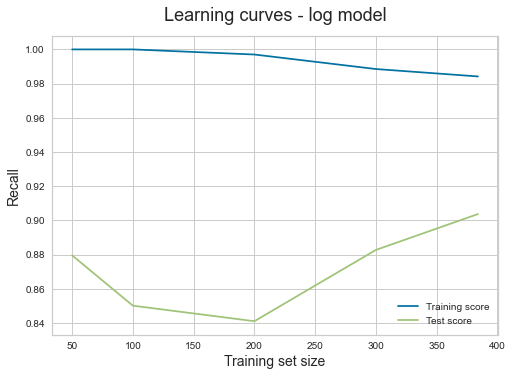

In [108]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = model8,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,384],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

# Model After Scaling and Normalisation and Data Cleaning

In [28]:
df_scaled = pd.read_csv('../data/df_scaled.csv')
df_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.00,0.00,0.50,0.00,0.00,0.25,0.19,0.00,0.00,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,0.00,1.00,-0.29,-0.48,-0.89,0.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,1.00,0.00,-0.43,0.57,-0.11,0.00,0.00,0.00,0.00,1.00
3,0.00,-1.00,0.00,0.00,0.00,0.72,-0.48,0.19,0.00,0.00,0.00,0.00,1.00
4,0.00,0.00,1.00,0.00,1.00,0.53,1.38,1.99,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.00,-1.00,0.00,0.00,0.00,-0.32,-0.48,-0.81,0.00,0.00,1.00,0.00,0.00
476,0.00,0.00,1.50,0.00,0.00,0.08,-0.48,-1.26,-180.00,0.00,1.00,0.00,0.00
477,0.00,0.00,0.50,0.00,0.00,1.43,-0.37,1.79,0.00,0.00,0.00,0.00,1.00
478,0.00,0.00,1.00,0.00,0.00,1.26,-0.48,0.84,0.00,0.00,0.00,0.00,1.00


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

# df3 = pd.read_csv('../data/df_scaled.csv')
X = df_scaled
y = df_OHEncoded['Loan_Status']

# split
X_tr, X_tst, y_tr, y_tst1 = train_test_split(X,y, test_size=0.3, random_state=0)


k_values = [1, 2, 3, 4, 5, 6, 7]

	# define pipeline
model = GradientBoostingClassifier()
over = ADASYN()
# Fit_transform pipe
steps = [('over', over), ('model', model)]
modelNS1 = imbpipeline(steps=steps)
modelNS1.fit(X_tr, y_tr)
modelNS1.predict(X_tst)
modelNS1.score(X_tst, y_tst1)
# Mertic for Viz
y_pred1 = np.around(modelNS1.predict(X_tst))
print(classification_report(y_tst1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.62      0.41      0.49        49
         1.0       0.74      0.87      0.80        95

    accuracy                           0.72       144
   macro avg       0.68      0.64      0.65       144
weighted avg       0.70      0.72      0.70       144



[0.         0.59183673 1.        ] [0.         0.87368421 1.        ]
64.09237379162191


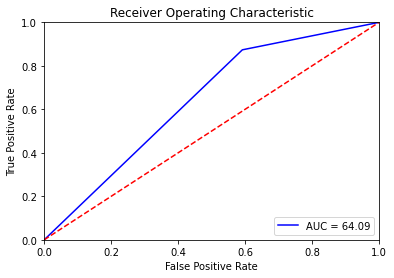

In [30]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_tst1,y_pred1,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

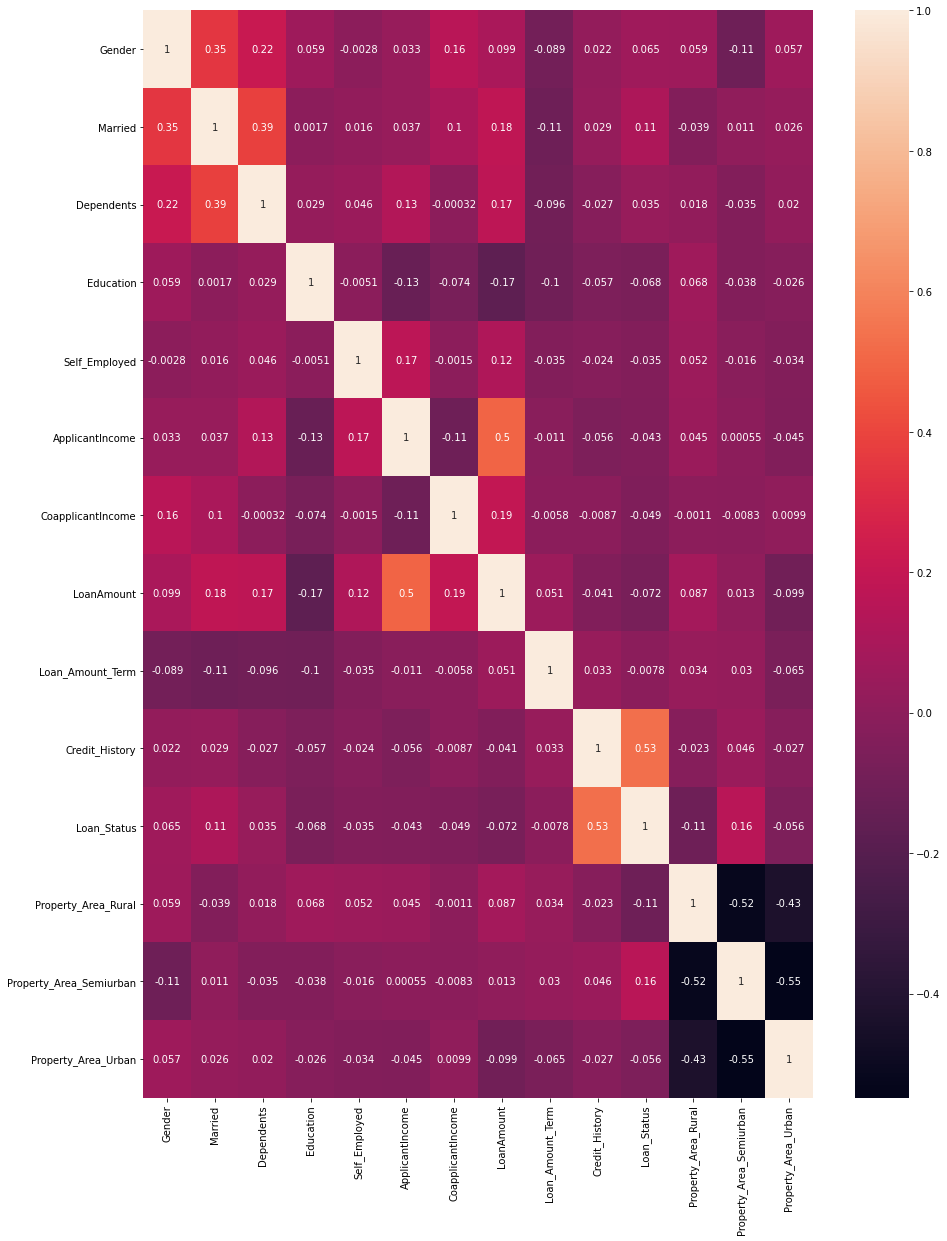

In [31]:
correlation = df_OHEncoded.corr()
plt.figure(figsize=(15, 20))
sns.heatmap(correlation, annot=True)
plt.show()

CLUSTER !!!!

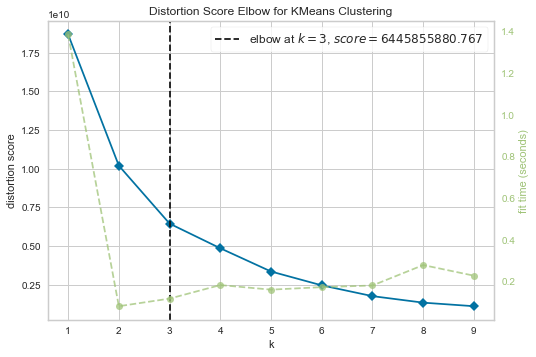

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from sklearn.cluster import KMeans
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


# Generate synthetic dataset with 8 random clusters
to_clusterize = df_OHEncoded.drop('Loan_ID',axis=1).copy()

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(to_clusterize)        # Fit the data to the visualizer
visualizer.show()

3 cluster se distingue

In [35]:
# import pickle
kmeans = to_clusterize

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
#pickle.dump(kmeansed, open('../DATA/kmean.sav', 'wb'))
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)


In [36]:
pd.set_option('display.max_rows', None)
clusterer = kmeans
clusterer.head()

# df['Full Date'] = df['Day'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)
# print (df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,kmeans_cluster
1,1.00,1.00,1.00,0.00,0.00,4583,1508.00,128.00,360.00,1.00,0.00,1,0,0,0
2,1.00,1.00,0.00,0.00,1.00,3000,0.00,66.00,360.00,1.00,1.00,0,0,1,0
3,1.00,1.00,0.00,1.00,0.00,2583,2358.00,120.00,360.00,1.00,1.00,0,0,1,0
4,1.00,0.00,0.00,0.00,0.00,6000,0.00,141.00,360.00,1.00,1.00,0,0,1,0
5,1.00,1.00,2.00,0.00,1.00,5417,4196.00,267.00,360.00,1.00,1.00,0,0,1,0


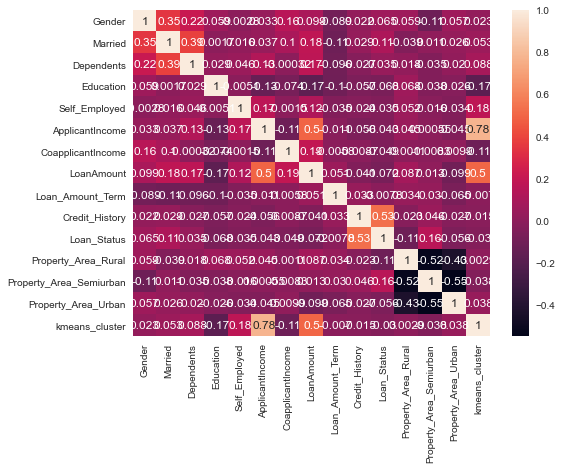

In [37]:
correlation = clusterer.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()

### Data Cleaning

In [76]:

df_cleaned = df_OHEncoded.drop('Loan_ID',axis=1).copy()
df_corr = df_OHEncoded.corr()['Loan_Status'] # 
golden_features_list = df_cleaned.columns[abs(df_corr) > 0.10]
print(golden_features_list)
df_clean = df_OHEncoded[golden_features_list]

Index(['Married', 'Credit_History', 'Loan_Status', 'Property_Area_Rural',
       'Property_Area_Semiurban'],
      dtype='object')


In [95]:
df_clean.head()

,Married,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
1,1.00,1.00,0.00,1,0
2,1.00,1.00,1.00,0,0
3,1.00,1.00,1.00,0,0
4,0.00,1.00,1.00,0,0
5,1.00,1.00,1.00,0,0


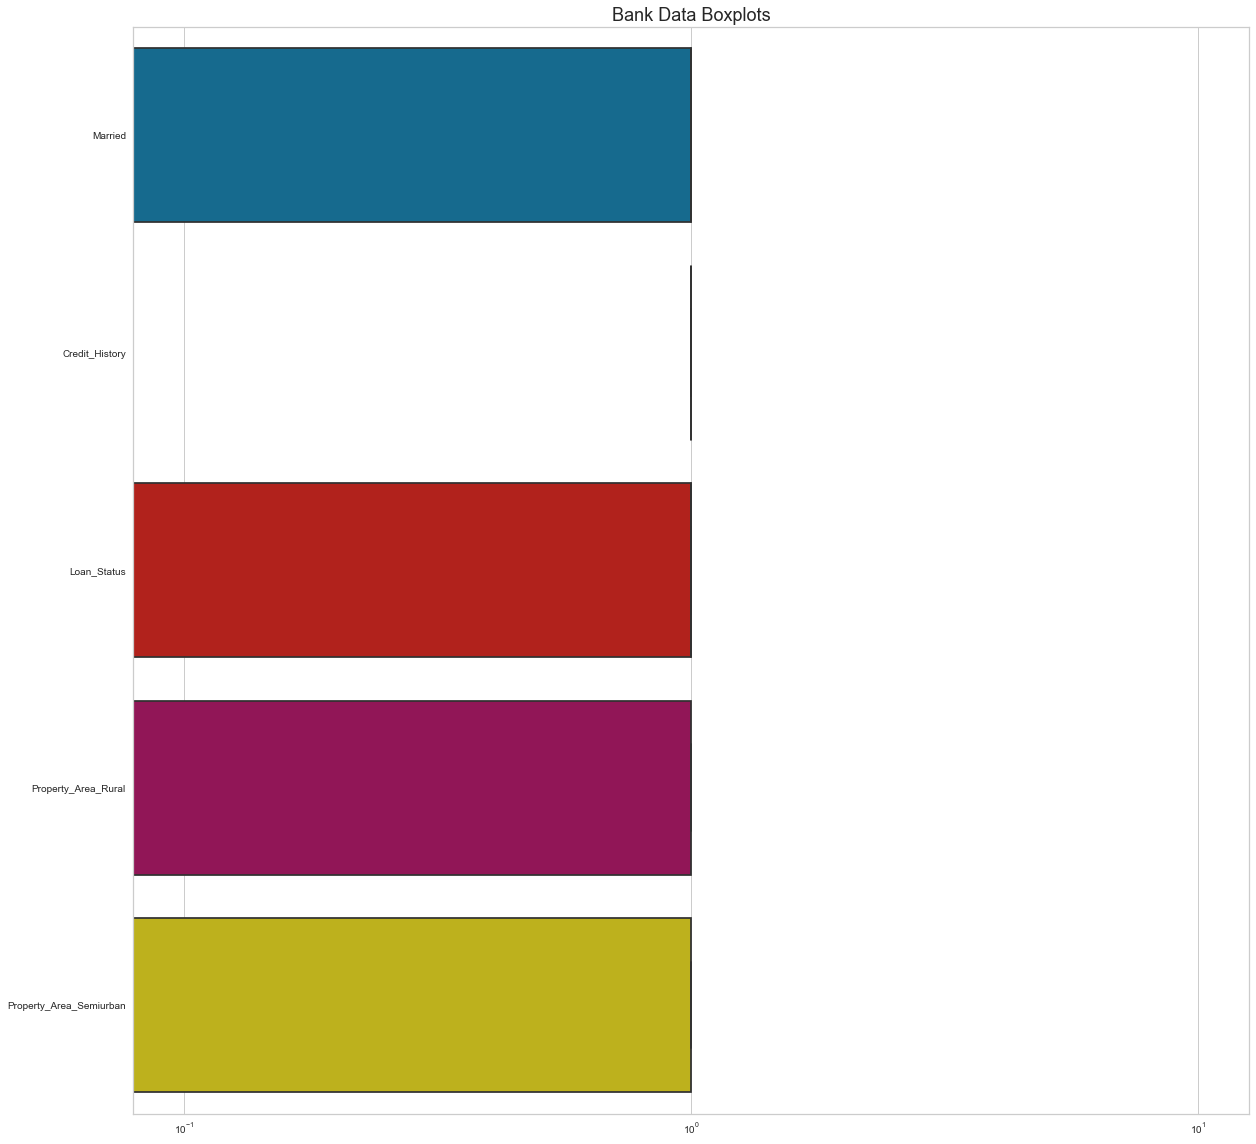

In [78]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df_clean, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  480 non-null    float64
 1   Credit_History           480 non-null    float64
 2   Loan_Status              480 non-null    float64
 3   Property_Area_Rural      480 non-null    uint8  
 4   Property_Area_Semiurban  480 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 15.9 KB


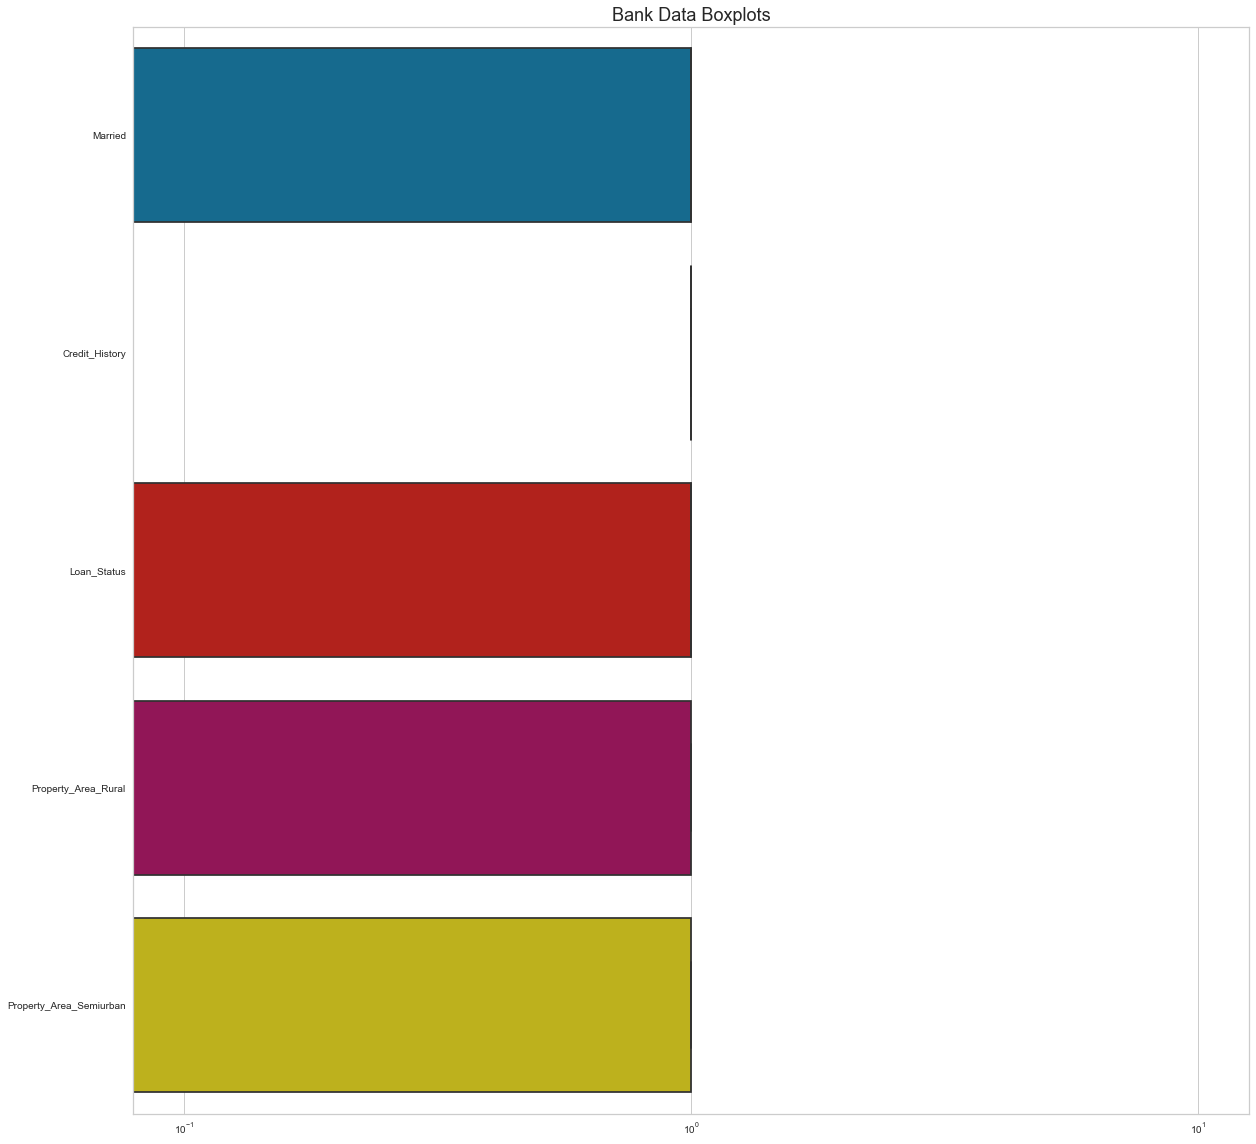

In [80]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df_clean, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### RandomForest ADASYN

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

X = df_clean.drop('Loan_Status',axis=1)
y = df_OHEncoded['Loan_Status']

# split
X_tr, X_tst, y_tr, y_tst2 = train_test_split(X,y, test_size=0.3, random_state=0)

# define pipeline
model = RandomForestRegressor(n_estimators=25,max_depth=20,max_features=2)
over = ADASYN()
# Fit_transform pipe
steps = [('over', over), ('model', model)]
modelNSC2 = imbpipeline(steps=steps)
modelNSC2.fit(X_tr, y_tr)
modelNSC2.predict(X_tst)
modelNSC2.score(X_tst, y_tst2)
# Metric for viz
y_pred2 = np.around(modelNSC2.predict(X_tst))
print(classification_report(y_tst2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.47      0.76      0.58        49
         1.0       0.82      0.57      0.67        95

    accuracy                           0.63       144
   macro avg       0.65      0.66      0.63       144
weighted avg       0.70      0.63      0.64       144



[0.         0.24489796 1.        ] [0.         0.56842105 1.        ]
66.17615467239527


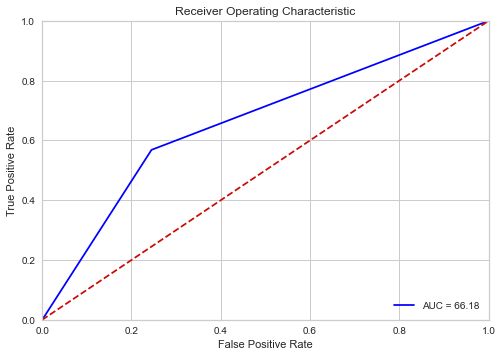

In [82]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_tst2,y_pred2,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# DF Normalize and Scaled

#               precision    recall  f1-score   support

#            0       0.98      0.97      0.97      1987
#            1       0.27      0.44      0.34        59

#     accuracy                           0.95      2046
#    macro avg       0.63      0.70      0.66      2046
# weighted avg       0.96      0.95      0.96      2046


Medium recall for company that go Bankrut(1) 

### DecisionTreeClassifier ADSYN Random Sampler

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN

X = df_clean.drop('Loan_Status',axis=1)
y = df_OHEncoded['Loan_Status']

# split
X_tr, X_tst, y_tr, y_tst3 = train_test_split(X,y, test_size=0.3, random_state=0)


# k_values = [1, 2, 3, 4, 5, 6, 7]

	# define pipeline
model = DecisionTreeClassifier()
over = ADASYN()
# under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
modelNSC3 = imbpipeline(steps=steps)
modelNSC3.fit(X_tr, y_tr)
modelNSC3.predict(X_tst)
modelNSC3.score(X_tst, y_tst3)
y_pred3 = modelNSC3.predict(X_tst)
print(classification_report(y_tst3, y_pred3))

              precision    recall  f1-score   support

         0.0       0.47      0.76      0.58        49
         1.0       0.82      0.57      0.67        95

    accuracy                           0.63       144
   macro avg       0.65      0.66      0.63       144
weighted avg       0.70      0.63      0.64       144



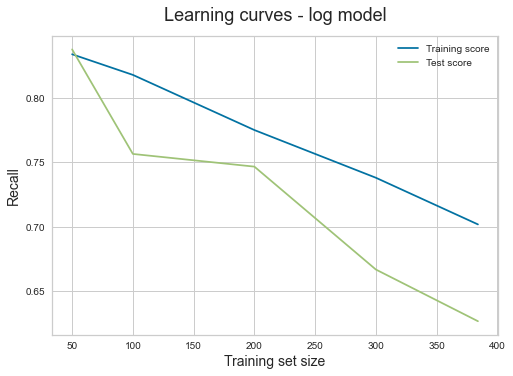

In [84]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = modelNSC3,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,384],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

[0.         0.24489796 1.        ] [0.         0.56842105 1.        ]
66.17615467239527


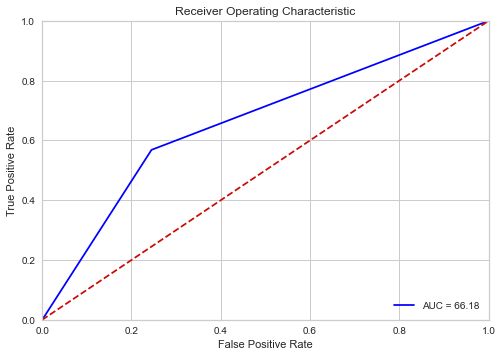

In [85]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_tst3,y_pred3,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
# DF Normalise an Scaled

#               precision    recall  f1-score   support

#            0       0.98      0.95      0.96      1987
#            1       0.15      0.32      0.21        59

#     accuracy                           0.93      2046
#    macro avg       0.57      0.63      0.58      2046
# weighted avg       0.96      0.93      0.94      2046

### Gradient Boosting ADASYN

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

X = df_clean.drop('Loan_Status',axis=1)
y = df_OHEncoded['Loan_Status']
# split
X_tr, X_tst, y_tr, y_tst4 = train_test_split(X,y, test_size=0.3, random_state=0)


# define pipeline
model = GradientBoostingClassifier()
over = ADASYN()


steps = [('over', over), ('model', model)]
modelNSC4 = imbpipeline(steps=steps)
modelNSC4.fit(X_tr, y_tr)
modelNSC4.predict(X_tst)
modelNSC4.score(X_tst, y_tst4)
y_pred4 = modelNSC4.predict(X_tst)
print(classification_report(y_tst4, y_pred4))

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.57        49
         1.0       0.79      0.71      0.74        95

    accuracy                           0.68       144
   macro avg       0.66      0.67      0.66       144
weighted avg       0.70      0.68      0.69       144



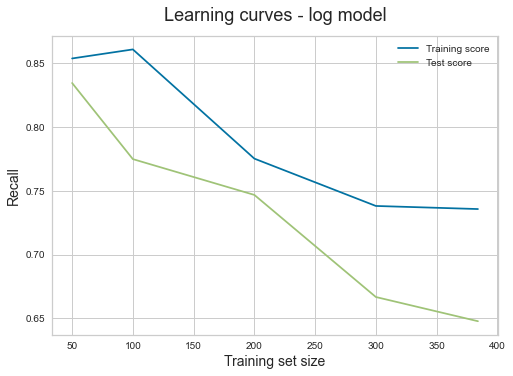

In [88]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = modelNSC4,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,384],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

[0.         0.36734694 1.        ] [0.         0.70526316 1.        ]
66.89581095596134


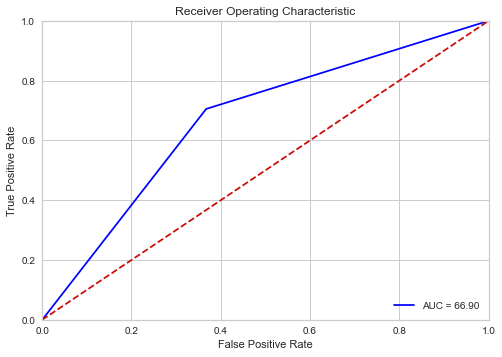

In [89]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_tst4,y_pred4,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
# DF Normalize and Scaled

#               precision    recall  f1-score   support

#            0       0.98      0.95      0.97      1987
#            1       0.20      0.41      0.27        59

#     accuracy                           0.94      2046
#    macro avg       0.59      0.68      0.62      2046
# weighted avg       0.96      0.94      0.95      2046

In [91]:
# DF Normalise

#             precision    recall  f1-score   support

#            0       0.99      0.90      0.94      1987
#            1       0.18      0.75      0.29        59

#     accuracy                           0.90      2046
#    macro avg       0.59      0.82      0.62      2046
# weighted avg       0.97      0.90      0.93      2046

Best Recall for company that go bankrut, with a good recall for companies with good reviews 

### Preparation for Stacking

In [92]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

mod1 = SGDClassifier()
mod2 = DecisionTreeClassifier()
mod3 = RadiusNeighborsClassifier()

for model in (mod1,mod2,mod3):
    over = ADASYN()
    steps = [('over', over), ('model', model)]
    pipe = imbpipeline(steps=steps)
    pipe.fit(X_tr, y_tr)
    pipe.predict(X_tst)
    pipe.score(X_tst, y_tst)
    y_pred = pipe.predict(X_tst)
    print(classification_report(y_tst, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.76      0.58        49
         1.0       0.82      0.57      0.67        95

    accuracy                           0.63       144
   macro avg       0.65      0.66      0.63       144
weighted avg       0.70      0.63      0.64       144

              precision    recall  f1-score   support

         0.0       0.47      0.76      0.58        49
         1.0       0.82      0.57      0.67        95

    accuracy                           0.63       144
   macro avg       0.65      0.66      0.63       144
weighted avg       0.70      0.63      0.64       144

              precision    recall  f1-score   support

         0.0       0.60      0.53      0.57        49
         1.0       0.77      0.82      0.80        95

    accuracy                           0.72       144
   macro avg       0.69      0.68      0.68       144
weighted avg       0.72      0.72      0.72       144



### SGDClassifier ADASYN

In [110]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import SGDClassifier

X = df_clean.drop('Loan_Status',axis=1)
y = df_OHEncoded['Loan_Status']

# split
X_tr, X_tst, y_tr, y_tst = train_test_split(X,y, test_size=0.3, random_state=0)


# k_values = [1, 2, 3, 4, 5, 6, 7]

	# define pipeline
model = RadiusNeighborsClassifier()
over = ADASYN()
# under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
modelNSC5 = imbpipeline(steps=steps)
modelNSC5.fit(X_tr, y_tr)
modelNSC5.predict(X_tst)
modelNSC5.score(X_tst, y_tst)
y_pred = modelNSC5.predict(X_tst)
print(classification_report(y_tst, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.53      0.57        49
         1.0       0.77      0.82      0.80        95

    accuracy                           0.72       144
   macro avg       0.69      0.68      0.68       144
weighted avg       0.72      0.72      0.72       144



<!-- Normalise and Scaled

              precision    recall  f1-score   support

           0       0.99      0.52      0.68      1987
           1       0.05      0.85      0.09        59

    accuracy                           0.53      2046
   macro avg       0.52      0.68      0.39      2046
weighted avg       0.96      0.53      0.66      2046 -->

**Same model with normalisation Only**

         precision    recall  f1-score   support

            0       1.00      0.81      0.89      1987
            1       0.13      0.92      0.22        59

             accuracy                           0.81      2046
            macro avg       0.56      0.86      0.56      2046
         weighted avg       0.97      0.81      0.88      2046

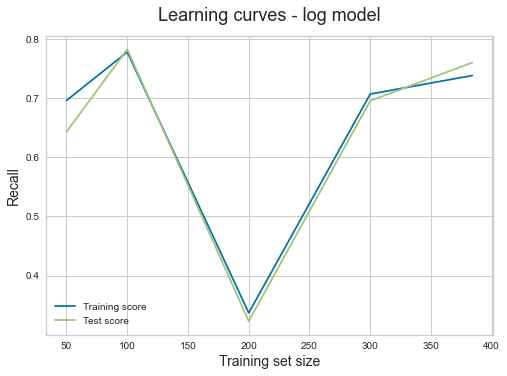

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = modelNSC5,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,384],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

[0.         0.42857143 1.        ] [0.         0.68421053 1.        ]
62.78195488721804


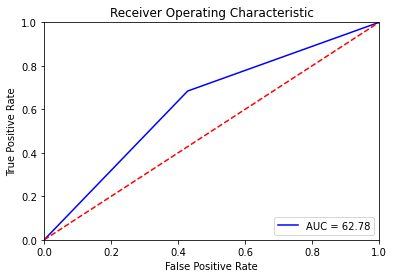

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_tst,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()